In [1]:
############################################ Importing Packages ############################################
import pandas as pd
import numpy as np
import math
from collections import Counter as count

import matplotlib.pyplot as plt
%matplotlib inline

print("## Packages Loaded!")

## Packages Loaded!


In [2]:
############################################ Functions ############################################
def loadData():
    X_test = pd.read_csv('data/X_test.csv', header=None) ; X_train = pd.read_csv('data/X_train.csv', header=None)
    y_test = pd.read_csv('data/y_test.csv', header=None) ; y_train = pd.read_csv('data/y_train.csv', header=None)
    X_test[5]=1 ; X_train[5]=1
    X_test = X_test.as_matrix() ; X_train = X_train.as_matrix()
    y_test = y_test.as_matrix() ; y_train = y_train.as_matrix()
    return X_train, X_test, y_train, y_test

def initDicts(Rounds,x):
    dict_sample, dict_main={}, {}
    for i in range(len(x)+1):
        dict_sample[i]=0
    for i in range(1,Rounds+1):
        dict_main[i]={}
    return dict_sample, dict_main

def initWeights(x):
    w_init=1/len(x)
    w=np.empty(len(x))
    w.fill(w_init)
    return w

def updateFunc(alpha, y, pred, w):
    weight = w*math.exp(-1*y*pred*alpha)
    return weight
  
def updateWeight(alpha, y, pred, w):
    w=[(updateFunc(alpha,true,pred, weight)) for weight,true,pred in zip(w,y,pred)]
    w=w/sum(w)
    return w

def getLeastSquaresWeight(x,y):
    X_t=x.T
    w_ls=np.linalg.inv(X_t.dot(x)).dot(X_t).dot(y)
    return w_ls

def getAlpha(error):
    alpha= (1/2)*math.log((1-error)/error)
    return alpha

def predictLeastSquares(x,w_ls):
    predict=np.sign(x.dot(w_ls))
    return predict

def errorUpdate(w,y,pred,error):
    for weight,true,pred in zip(w,y,pred):
        if true!=pred:
            error=error+weight
    return error

def getError(dict_main,Rounds,x,y):
    Error, prediction_update = [], 0
    for i in range(1,Rounds+1):
        prediction_update += dict_main[i]['Alpha']*np.sign(x.dot(dict_main[i]['LeastSquaresWeight']))
        prediction = np.sign(prediction_update)
        Error.append(np.sum(y!=prediction)/len(x))
        
    return Error

def getUpperBound(Rounds,dict_main):
    upperBound, Sum = [] , 0
    for i in range(1,Rounds+1):
        var = ((1/2)-dict_main[i]['Error'])**2
        Sum = Sum + var
        U_bound = math.exp(-2 *Sum)
        upperBound.append(U_bound)
    return upperBound

def Main(Rounds, X_train, y_train, w, dict_sample, dict_main):
    XCopy=X_train.copy()
    yCopy=y_train.copy()
    for i in range(1,Rounds+1):
        error = 0; threshold = 0.5 
        select = np.random.choice(range(len(X_train)), size=len(X_train), replace=True, p=w)
        X_train = XCopy[select,:]
        y_train = yCopy[select,:]
        num = count(select)

        for key, value in num.items():
            dict_sample[key] = dict_sample[key]+value

        w_ls = getLeastSquaresWeight(X_train,y_train)
        predict = predictLeastSquares(XCopy, w_ls)    
        error = errorUpdate (w,yCopy,predict,error)

        if error > 0.5:
            error = 0
            w_ls = w_ls*-1
            predict = predictLeastSquares(XCopy, w_ls)
            error = errorUpdate (w,yCopy,predict,error)

        alpha=getAlpha(error)
        w = updateWeight(alpha, yCopy, predict, w)
        
        dict_main[i] =  {
                            'Error':error,
                            'LeastSquaresWeight':w_ls,
                            'Alpha':alpha,       
                        }
    print("Done!")
    return dict_sample, dict_main
print("## Functions Loaded!")

## Functions Loaded!


In [3]:
X_train, X_test, y_train, y_test = loadData()
Rounds = 1500

In [4]:
print("X train shape: " , X_train.shape)
print("X test shape: " , X_test.shape)
print("y train shape: " , y_train.shape)
print("y test shape: " , y_test.shape)

X train shape:  (1036, 6)
X test shape:  (1000, 6)
y train shape:  (1036, 1)
y test shape:  (1000, 1)


In [5]:
w= initWeights(X_train)
dict_sample, dict_main = initDicts(Rounds,X_train) 
dict_sample, dict_main = Main(Rounds, X_train, y_train, w, dict_sample, dict_main)

Done!


In [6]:
Train_Error = getError(dict_main,Rounds,X_train,y_train)
Test_Error = getError(dict_main,Rounds,X_test,y_test)

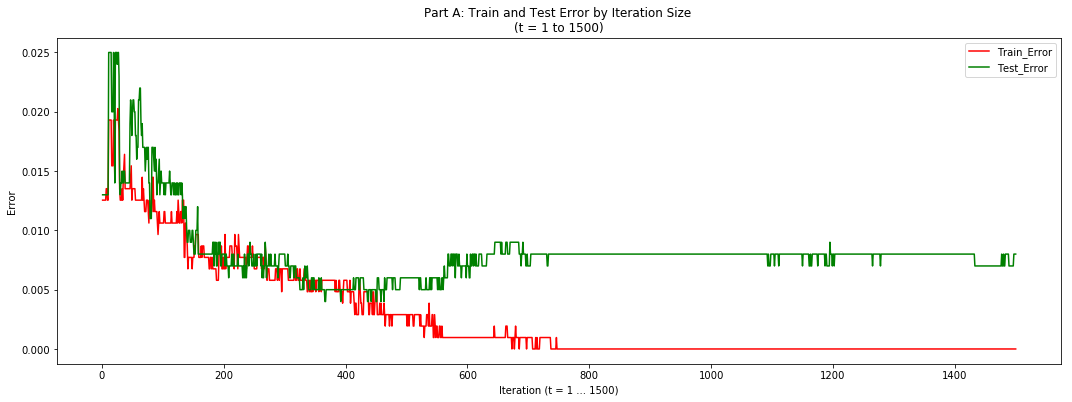

In [7]:
############################################ PLOT PART A ############################################
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 6

plot1 = plt.plot(range(1,Rounds+1), Train_Error,label='Train_Error')
plt.setp(plot1,'color', 'r')
plot2 = plt.plot(range(1,Rounds+1), Test_Error,label='Test_Error')
plt.setp(plot2,'color', 'g')

plt.xlabel('Iteration (t = 1 ... 1500)')
plt.ylabel('Error')
plt.legend()
plt.title("Part A: Train and Test Error by Iteration Size \n(t = 1 to 1500)")


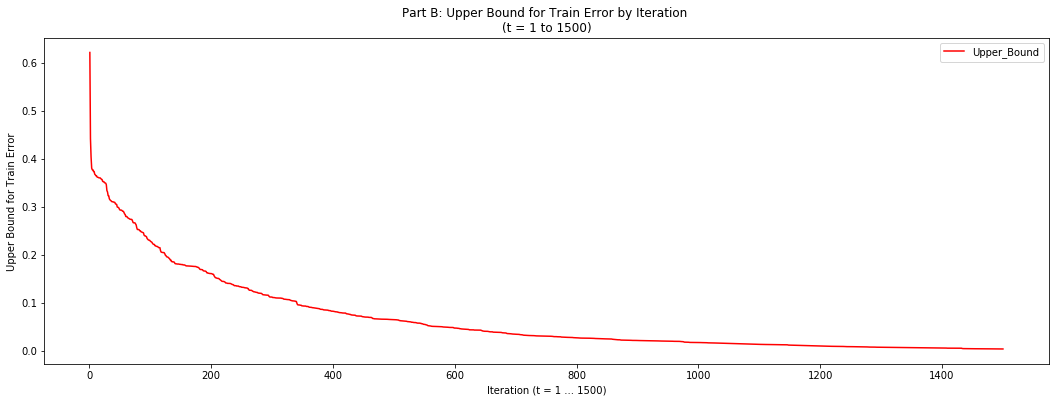

In [8]:
############################################ PLOT PART B ############################################
upperBound = getUpperBound(Rounds,dict_main)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 6

plot1 = plt.plot(range(1,Rounds+1), upperBound,label='Upper_Bound')
plt.setp(plot1,'color', 'r')

plt.xlabel('Iteration (t = 1 ... 1500)')
plt.ylabel('Upper Bound for Train Error')
plt.legend()
plt.title("Part B: Upper Bound for Train Error by Iteration \n(t = 1 to 1500)")

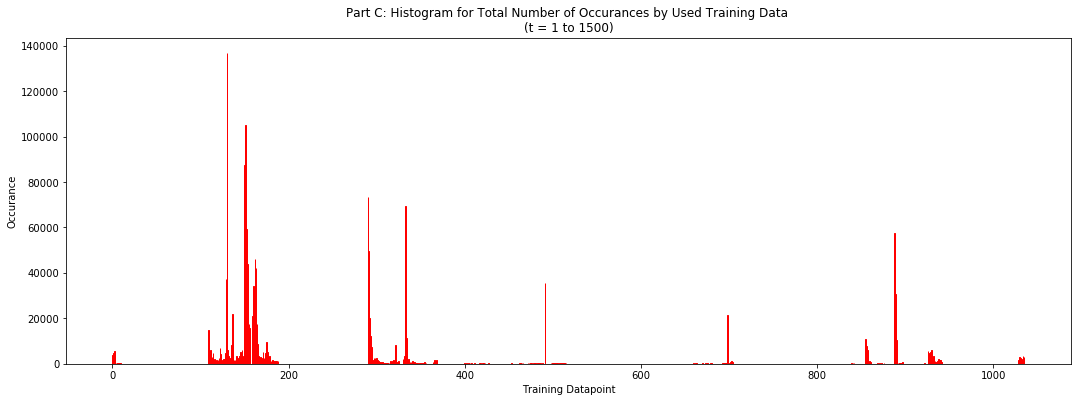

In [9]:
############################################ PLOT PART C ############################################
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 6

plot= plt.bar(range(len(X_train)+1),list(dict_sample.values()))
plt.setp(plot,'color', 'r')
plt.xlabel('Training Datapoint')
plt.ylabel('Occurance')
plt.title("Part C: Histogram for Total Number of Occurances by Used Training Data \n(t = 1 to 1500)")



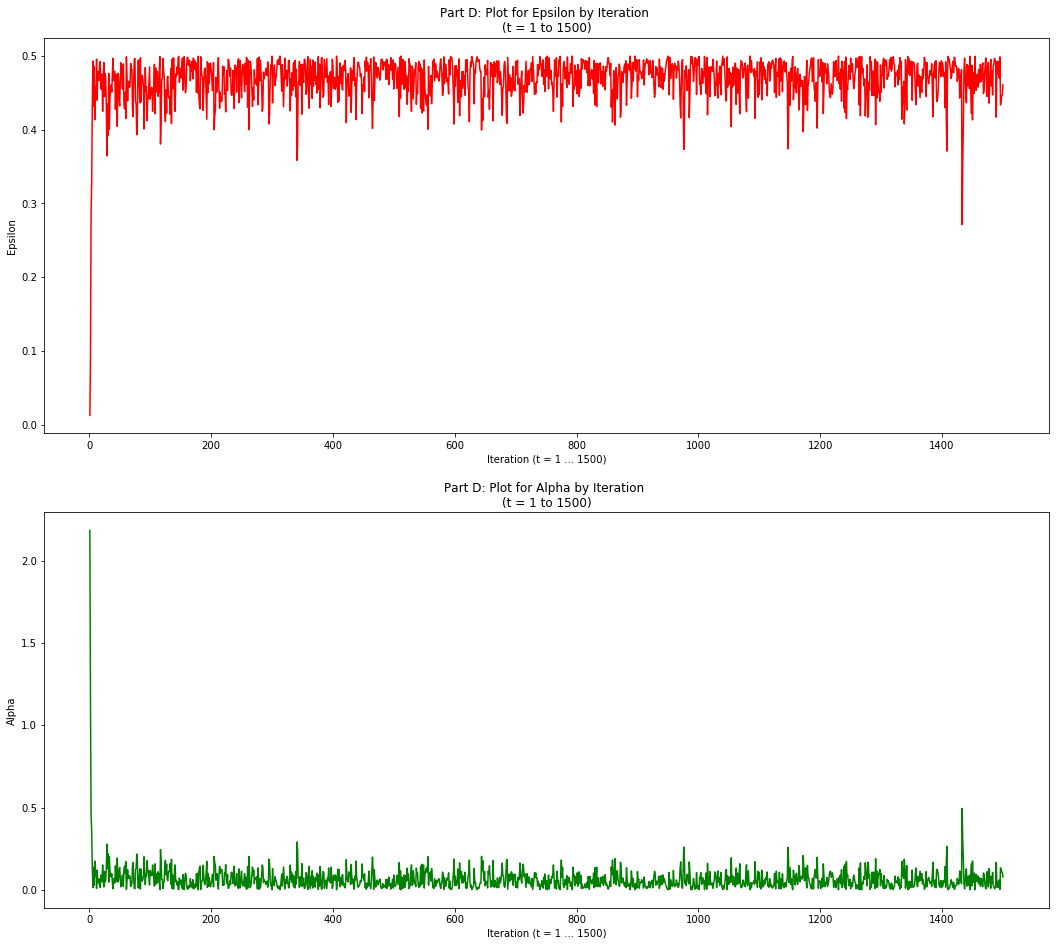

In [10]:
############################################ PLOT PART D ############################################
Error, Alpha = [] , []

for i in dict_main.keys():
    Error.append(dict_main[i]['Error'])
    Alpha.append(dict_main[i]['Alpha'])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 16

fig, ax = plt.subplots(2,1)

ax[0].plot(range(1,Rounds+1),Error, 'r') ; ax[0].set_title("Part D: Plot for Epsilon by Iteration \n(t = 1 to 1500)")
ax[1].plot(range(1,Rounds+1),Alpha, 'g') ; ax[1].set_title("Part D: Plot for Alpha by Iteration \n(t = 1 to 1500)")
ax[0].set_xlabel('Iteration (t = 1 ... 1500)') ; ax[1].set_xlabel('Iteration (t = 1 ... 1500)')
ax[0].set_ylabel('Epsilon') ; ax[1].set_ylabel('Alpha')